# Part 1. Using abagen to update the coordinates of AHBA bulk tissue samples
## Step 0
From the downloaded AHBA data, run the script `00_aggregate_ahba.R` to generate `ahba_sampleInfo.csv`. This step just aggregate necessary information from the raw sample annotations.

## Step 1
Now we use [abagen](https://abagen.readthedocs.io/en/stable/) just to correct the MNI coordinates, so we just use the default parameters for this step. 

(Note: abagen automatically download the data for yous, so you can also use abagen to download the ABHA data, just remember to customize the file structure in the above R script. e.g. `donor9861`->`/microarray/normalized_microarray_donor9861`)

In [1]:
import pandas as pd
import numpy as np
import abagen
import os.path
import matplotlib.pyplot as plt 

In [15]:
expression, coords = abagen.get_samples_in_mask(mask=None,norm_structures='cortex',return_report=True,verbose=1)

Downloaded 425988059 of 425988059 bytes (100.0%,    0.0s remaining) ...done. (437 seconds, 7 min)
Extracting data from /Users/zhangxihan/abagen-data/microarray/9f51a604a582b13fb1d4dd71e4747903/normalized_microarray_donor9861/donor9861.zip..... done.


Downloaded 400957002 of 400957002 bytes (100.0%,    0.0s remaining) ...done. (342 seconds, 5 min)
Extracting data from /Users/zhangxihan/abagen-data/microarray/9f51a604a582b13fb1d4dd71e4747903/normalized_microarray_donor10021/donor10021.zip..... done.


Downloaded 166233851 of 166233851 bytes (100.0%,    0.0s remaining) ...done. (335 seconds, 5 min)
Extracting data from /Users/zhangxihan/abagen-data/microarray/9f51a604a582b13fb1d4dd71e4747903/normalized_microarray_donor12876/donor12876.zip..... done.


Downloaded 241359585 of 241359585 bytes (100.0%,    0.0s remaining) ...done. (260 seconds, 4 min)
Extracting data from /Users/zhangxihan/abagen-data/microarray/9f51a604a582b13fb1d4dd71e4747903/normalized_microarray_donor14380/donor14380.zip..... done.


Downloaded 216077630 of 216077630 bytes (100.0%,    0.0s remaining) ...done. (204 seconds, 3 min)
Extracting data from /Users/zhangxihan/abagen-data/microarray/9f51a604a582b13fb1d4dd71e4747903/normalized_microarray_donor15496/donor15496.zip..... done.


Downloaded 230640408 of 230640408 bytes (100.0%,    0.0s remaining) ...done. (371 seconds, 6 min)
Extracting data from /Users/zhangxihan/abagen-data/microarray/9f51a604a582b13fb1d4dd71e4747903/normalized_microarray_donor15697/donor15697.zip..... done.
INFO: Group-level atlas provided; using MNI coords for tissue samples
INFO: Reannotating probes with information from Arnatkevic̆iūtė et al., 2019, NeuroImage
INFO: Filtering probes with intensity-based threshold of 0.5
INFO: 31569 probes survive intensity-based filtering
INFO: Reducing probes indexing same gene with method: diff_stability
INFO: 15633 genes remain after probe filtering + selection
INFO: 904 / 904 samples matched to regions for donor #9861
INFO: 845 / 845 samples matched to regions for donor #10021
INFO: 353 / 353 samples matched to regions for donor #12876
INFO: 513 / 513 samples matched to regions for donor #14380
INFO: 437 / 437 samples matched to regions for donor #15496
INFO: 414 / 414 samples matched to regions for d

#### Let's take a look at the output:

In [16]:
expression

gene_symbol,A1BG,A1BG-AS1,A2M,A2ML1,A3GALT2,A4GALT,AAAS,AACS,AADACL3,AADAT,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
well_id,,,,,,,,,,,,,,,,,,,,,
594,0.315554,0.682580,0.737665,0.389075,0.373331,0.243184,0.792612,0.823750,0.341392,0.863393,...,0.694914,0.183440,0.297634,0.701540,0.357551,0.375834,0.573471,0.791614,0.663304,0.278961
2985,0.732844,0.782728,0.168801,0.301045,0.861295,0.608451,0.472726,0.842380,0.287554,0.606065,...,0.188697,0.874966,0.331889,0.805014,0.443195,0.397592,0.784719,0.854141,0.466819,0.791220
2801,0.920879,0.709991,0.375845,0.053227,0.515251,0.907052,0.252638,0.598055,0.238224,0.408537,...,0.637053,0.827446,1.000000,0.113107,0.179394,0.798618,0.636800,0.688660,0.132625,0.394095
2273,0.269430,0.484319,0.625640,0.431403,0.526176,0.126178,0.055082,0.092200,0.843973,0.265357,...,0.352441,0.271404,0.418613,0.007727,0.043991,0.838427,0.027467,0.432122,0.431196,0.044869
2785,0.292512,0.610266,0.754151,0.182485,0.391889,0.797870,0.510508,0.088766,0.550605,0.596802,...,0.484203,0.534963,0.550278,0.325321,0.119763,0.509879,0.141953,0.234426,0.221654,0.591561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159439039,0.774530,0.686627,0.536363,0.893904,0.094880,0.757576,0.304016,0.844603,0.810886,0.744117,...,0.163946,0.879981,0.470296,0.596774,0.421937,0.426080,0.696795,0.603292,0.417130,0.684083
159438991,0.578929,0.000000,0.997968,1.000000,1.000000,0.680014,0.109822,0.259455,0.922404,1.000000,...,0.127143,0.000000,0.850837,0.122585,0.569163,0.014244,0.001635,0.176550,0.517948,1.000000
159438975,0.961996,0.016471,0.997173,0.133379,0.961108,0.894597,0.815378,0.376736,1.000000,0.997727,...,0.002575,0.122129,0.853969,0.000000,0.366702,0.462418,0.000000,0.073917,0.920213,0.992942


In [17]:
coords

,x,y,z
well_id,,,
594,6.281693,-26.769456,46.030920
2985,29.463218,17.371072,-6.841868
2801,30.916352,-19.971094,12.528056
2273,-24.471659,-23.995584,-2.006094
2785,33.052748,-30.720132,-12.020580
...,...,...,...
159439039,-22.782225,-6.139403,-17.047163
159438991,-2.064244,-60.443949,-32.234913
159438975,-1.473180,-57.650541,-30.316163


In [19]:
# output the expression matrix and coordinates to csv
coords.to_csv('/Volumes/GoogleDrive/My Drive/Gradient_Shift_Cellular_Basis/Milgram/para/data/ahba/ahba_group_samples_coords.csv',index=True)

### Update the MNI coordinates of the original sample info

In [12]:
# load the original table and abagen corrected coords
ahba_sampleInfo = pd.read_csv('/Volumes/GoogleDrive/My Drive/Gradient_Shift_Cellular_Basis/Milgram/para/data/ahba/ahba_sampleInfo.csv')
ahba_group_samples_coords = pd.read_csv('/Volumes/GoogleDrive/My Drive/Gradient_Shift_Cellular_Basis/Milgram/para/data/ahba/ahba_group_samples_coords.csv')

#### Let's take a look at the old coordinates for samples

In [13]:
ahba_sampleInfo

,structure_id,slab_num,well_id,slab_type,structure_acronym,structure_name,polygon_id,mri_voxel_x,mri_voxel_y,mri_voxel_z,mni_x,mni_y,mni_z,brain,reg_num,top_level,region_clean
0,4077,22,594,CX,PCLa-i,"paracentral lobule, anterior part, right, infe...",37470,87,52,116,5.9,-27.7,49.7,9861,4071.0,CTX,"paracentral lobule, anterior part"
1,4323,11,2985,CX,Cl,"claustrum, right",40517,66,92,63,29.2,17.0,-2.9,9861,NaN,NaN,NaN
2,4323,18,2801,CX,Cl,"claustrum, right",41516,66,81,104,28.2,-22.8,16.8,9861,NaN,NaN,NaN
3,4440,18,2273,CX,LGd,"dorsal lateral geniculate nucleus, left",41473,116,94,101,-24.6,-24.6,1.3,9861,12922.0,THAL,dorsal lateral geneiculate nucleus
4,4266,17,2785,CX,CA4,"CA4 field, right",41142,63,104,106,31.1,-31.3,-7.3,9861,12895.0,HIPP,CA4 field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3697,4342,7,159439039,CX,BLA,"basolateral nucleus, left",147057074,112,127,94,-21.0,-3.0,-18.0,15697,4341.0,AMYG,basolateral nucleus
3698,4785,64,159438991,CB,Glo,"globose nucleus, left",156978055,93,139,156,-2.0,-65.0,-30.0,15697,NaN,NaN,NaN
3699,4783,64,159438975,CB,Emb,"emboliform nucleus, left",156978968,93,136,153,-2.0,-62.0,-27.0,15697,NaN,NaN,NaN
3700,4782,64,159438959,CB,Dt,"dentate nucleus, left",156419141,93,127,155,-2.0,-64.0,-18.0,15697,NaN,NaN,NaN


In [37]:
# match the coordinates names
ahba_group_samples_coords = ahba_group_samples_coords.rename(columns={"x": "mni_x", "y": "mni_y","z":"mni_z"})

# replace the original mni coordinates with reannotated coordinates
ahba_sampleInfo = ahba_sampleInfo.set_index('well_id')
ahba_group_samples_coords = ahba_group_samples_coords.set_index('well_id')
ahba_sampleInfo.update(ahba_group_samples_coords)
ahba_sampleInfo.reset_index(inplace=True)

# save it
ahba_sampleInfo.to_csv('/Volumes/GoogleDrive/My Drive/Gradient_Shift_Cellular_Basis/Milgram/para/data/ahba/ahba_sampleInfo_reannot.csv',index=False)

#### Now look at the updated coordinates

In [38]:
ahba_sampleInfo

,well_id,structure_id,slab_num,slab_type,structure_acronym,structure_name,polygon_id,mri_voxel_x,mri_voxel_y,mri_voxel_z,mni_x,mni_y,mni_z,brain,reg_num,top_level,region_clean
0,594,4077,22,CX,PCLa-i,"paracentral lobule, anterior part, right, infe...",37470,87,52,116,6.281693,-26.769456,46.030920,9861,4071.0,CTX,"paracentral lobule, anterior part"
1,2985,4323,11,CX,Cl,"claustrum, right",40517,66,92,63,29.463218,17.371072,-6.841868,9861,NaN,NaN,NaN
2,2801,4323,18,CX,Cl,"claustrum, right",41516,66,81,104,30.916352,-19.971094,12.528056,9861,NaN,NaN,NaN
3,2273,4440,18,CX,LGd,"dorsal lateral geniculate nucleus, left",41473,116,94,101,-24.471659,-23.995584,-2.006094,9861,12922.0,THAL,dorsal lateral geneiculate nucleus
4,2785,4266,17,CX,CA4,"CA4 field, right",41142,63,104,106,33.052748,-30.720132,-12.020580,9861,12895.0,HIPP,CA4 field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3697,159439039,4342,7,CX,BLA,"basolateral nucleus, left",147057074,112,127,94,-22.782225,-6.139403,-17.047163,15697,4341.0,AMYG,basolateral nucleus
3698,159438991,4785,64,CB,Glo,"globose nucleus, left",156978055,93,139,156,-2.064244,-60.443949,-32.234913,15697,NaN,NaN,NaN
3699,159438975,4783,64,CB,Emb,"emboliform nucleus, left",156978968,93,136,153,-1.473180,-57.650541,-30.316163,15697,NaN,NaN,NaN
3700,159438959,4782,64,CB,Dt,"dentate nucleus, left",156419141,93,127,155,-1.313689,-57.506089,-24.491054,15697,NaN,NaN,NaN


# Part 2. Map the AHBA bulk tissue samples from volumetric to surface space
## Step 1
Run `01_1_project_freesurfer.bash` to project fsLR parcellations to individual AHBA freesurfer space.
## Step 2
Run `01_2_map_ahba_ctx_to_surface.py` to map native space AHBA sample coordinates (x,y,z) onto a 32k midthickness file that is spatially aligned with native cortical geometry (vertices are aligned across individuals)

The output files `sample_info_vertex_reannot_mapped.csv` and `ahba_sampleInfo_reannot.csv` are going to be used in the next section.

# Part 3. Fine tuning the abagen processing parameters
We conducted this part in the python script `01_3_preprocess_ahba_abagen.py` and `01_5_make_probe_table.py` that ran in the high performance computing clusters, Milgram, at Yale University. This notebook is for the tutorial purpose, and demonstrate the "behind-scene decision making".

This notebook pre-process the gene under different combinations of parameters of abagen toolbox, then compared the resulted gene lists with the gene list generated from previous published works by Anderson et al. Which validated the processed AHBA gene expressions and the imputed cell types that based upon it.
[Anderson, KM, Collins, MA, Chin, R, Ge T, Rosenberg MD, Holmes AJ. (2020). Transcriptional and imaging-genetic association of cortical interneurons, brain function, and schizophrenia risk. Nature Communications, 11, 2889](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7280213/pdf/41467_2020_Article_16710.pdf)

Different processing parameters will output the gene lists with a small portion of survived genes that are different. Anderson et al. didn't use the abagen toolbox, but the major difference came from intensity-based filtering, normalization, and prob selection methods. We thus tested different combinations of these three parameters and selected the combination maximize the overlap between the new gene list and the gene list from the published work, without including too much new genes (i.e. not at the price of relaxing the inclusion criteria for the qualified genes). The final combination is:
- ibf_threshold=0.3
- probe_selection='diff_stability'
- sample_norm='zscore'
- gene_norm='zscore'

Since the way genes are processed will influence the cell type imputation, we also made plots of cell type gene expression signatures derived based on the AHBA bulk expression profiles under different parameter combinations, then compared the pattern between Lake DFC and Lake VIS. The final combination didn't demonstrate visually different pattern from the previous work. The code for making these plot are in later sections `cibersortx_compare_plots.R`.

### Set up base dirs

In [2]:
base_dir = '/Volumes/GoogleDrive/My Drive/Gradient_Shift_Cellular_Basis/Milgram'
data_dir = os.path.join(base_dir,'para','data','ahba')
gene_list_dir = os.path.join(base_dir,'para','gene_lists')
files = abagen.fetch_microarray(donors='all', data_dir=base_dir)

# Fine-tune the pipeline parameters

## Step 1: Process the ahba data under different parameter combinations
For those who don't want to play with the parameters can skip this and just go the the "final pipeline"

In [4]:
# function for fine-tunning 
def preprocess_ahba(para_change, ibf_threshold=0.5, probe_selection='diff_stability', 
                    sample_norm='scaled_robust_sigmoid', gene_norm='scaled_robust_sigmoid'):
    
    # Step1: process the data
    expression, coords = abagen.get_samples_in_mask(mask=None,
                                                    ibf_threshold=ibf_threshold,
                                                    probe_selection=probe_selection,
                                                    sample_norm=sample_norm,
                                                    gene_norm=gene_norm,
                                                    norm_structures='cortex',
                                                    return_report=True,
                                                    verbose=1)
    # output the expression matrix to csv
    expression_dir = os.path.join(data_dir, f'ahba_group_samples_expression_{para_change}.csv')
    expression.to_csv(expression_dir,index=False)
    
    # Output the Gene Names (Symbols) for later Gene Symbols-Entrez ID conversion in R
    gene_symbols = expression.columns.tolist()
    gene_symbols = pd.DataFrame(gene_symbols)
    gene_symbols.to_csv(os.path.join(data_dir,f'ahba_expression_gene_names_{para_change}.csv'),index=False,header=False)
    
    # Step2: Update the MNI coordinates of the original sample info
    # load the original table
    ahba_sampleInfo_dir = os.path.join(data_dir,'ahba_sampleInfo.csv')
    ahba_sampleInfo = pd.read_csv(ahba_sampleInfo_dir)
    sample_info_vertex_reannot_mapped = pd.read_csv(os.path.join(data_dir,'sample_info_vertex_reannot_mapped.csv'))
    # match the coordinates names
    coords = coords.rename(columns={"x": "mni_x", "y": "mni_y","z":"mni_z"})
    # set the well_id as index
    ahba_sampleInfo = ahba_sampleInfo.set_index('well_id')
    #coords = coords.set_index('well_id')
    sample_info_vertex_reannot_mapped = sample_info_vertex_reannot_mapped.set_index('well_id')
    # replace the original mni coordinates with reannotated coordinates
    ahba_sampleInfo.update(coords)
    
    # Step3: make the table only contains rows overlapping with abagen expression matrix
    # select by intersected indices
    ahba_sampleInfo = ahba_sampleInfo[ahba_sampleInfo.index.isin(coords.index)]
    sample_info_vertex_reannot_mapped = sample_info_vertex_reannot_mapped[sample_info_vertex_reannot_mapped.index.isin(coords.index)]
    # set back the previous index
    ahba_sampleInfo.reset_index(inplace=True)
    sample_info_vertex_reannot_mapped.reset_index(inplace=True)
    
    # Step4: Save them
    # save it
    ahba_sampleInfo.to_csv(os.path.join(data_dir,f'ahba_sampleInfo_reannot_{para_change}.csv'),index=False)
    sample_info_vertex_reannot_mapped.to_csv(os.path.join(data_dir,f'sample_info_vertex_reannot_mapped_{para_change}.csv'),index=False)


### QC thresholds

In [26]:
thresholds = [0.1, 0.3, 0.5]

for i in list(range(3)):
    preprocess_ahba(para_change=thresholds[i], ibf_threshold=thresholds[i], probe_selection='diff_stability',
                    sample_norm='scaled_robust_sigmoid', gene_norm='scaled_robust_sigmoid')

INFO: Group-level atlas provided; using MNI coords for tissue samples
INFO: Reannotating probes with information from Arnatkevic̆iūtė et al., 2019, NeuroImage
INFO: Filtering probes with intensity-based threshold of 0.1
INFO: 36743 probes survive intensity-based filtering
INFO: Reducing probes indexing same gene with method: diff_stability
INFO: 17433 genes remain after probe filtering + selection
INFO: 904 / 904 samples matched to regions for donor #9861
INFO: 845 / 845 samples matched to regions for donor #10021
INFO: 353 / 353 samples matched to regions for donor #12876
INFO: 513 / 513 samples matched to regions for donor #14380
INFO: 437 / 437 samples matched to regions for donor #15496
INFO: 414 / 414 samples matched to regions for donor #15697
INFO: Group-level atlas provided; using MNI coords for tissue samples
INFO: Reannotating probes with information from Arnatkevic̆iūtė et al., 2019, NeuroImage
INFO: Filtering probes with intensity-based threshold of 0.3
INFO: 33856 probes s

### Probe Selection Method

In [27]:
preprocess_ahba(para_change='ProbeMax', ibf_threshold=0.5, probe_selection='max_intensity',
                    sample_norm='scaled_robust_sigmoid', gene_norm='scaled_robust_sigmoid')

INFO: Group-level atlas provided; using MNI coords for tissue samples
INFO: Reannotating probes with information from Arnatkevic̆iūtė et al., 2019, NeuroImage
INFO: Filtering probes with intensity-based threshold of 0.5
INFO: 31569 probes survive intensity-based filtering
INFO: Reducing probes indexing same gene with method: max_intensity
INFO: 15633 genes remain after probe filtering + selection
INFO: 904 / 904 samples matched to regions for donor #9861
INFO: 845 / 845 samples matched to regions for donor #10021
INFO: 353 / 353 samples matched to regions for donor #12876
INFO: 513 / 513 samples matched to regions for donor #14380
INFO: 437 / 437 samples matched to regions for donor #15496
INFO: 414 / 414 samples matched to regions for donor #15697


### Normalization Method

In [28]:
preprocess_ahba(para_change='NormZscore', ibf_threshold=0.5, probe_selection='diff_stability',
                    sample_norm='zscore', gene_norm='zscore')

INFO: Group-level atlas provided; using MNI coords for tissue samples
INFO: Reannotating probes with information from Arnatkevic̆iūtė et al., 2019, NeuroImage
INFO: Filtering probes with intensity-based threshold of 0.5
INFO: 31569 probes survive intensity-based filtering
INFO: Reducing probes indexing same gene with method: diff_stability
INFO: 15633 genes remain after probe filtering + selection
INFO: 904 / 904 samples matched to regions for donor #9861
INFO: 845 / 845 samples matched to regions for donor #10021
INFO: 353 / 353 samples matched to regions for donor #12876
INFO: 513 / 513 samples matched to regions for donor #14380
INFO: 437 / 437 samples matched to regions for donor #15496
INFO: 414 / 414 samples matched to regions for donor #15697


For those who don't want to go through this process can just use below code to process the AHBA samples.
### final pipeline

In [4]:
preprocess_ahba(para_change='NormZscore0.3', ibf_threshold=0.3, probe_selection='diff_stability',
                    sample_norm='zscore', gene_norm='zscore')

INFO: Group-level atlas provided; using MNI coords for tissue samples
INFO: Reannotating probes with information from Arnatkevic̆iūtė et al., 2019, NeuroImage
INFO: Filtering probes with intensity-based threshold of 0.3
INFO: 33856 probes survive intensity-based filtering
INFO: Reducing probes indexing same gene with method: diff_stability
INFO: 16383 genes remain after probe filtering + selection
INFO: 904 / 904 samples matched to regions for donor #9861
INFO: 845 / 845 samples matched to regions for donor #10021
INFO: 353 / 353 samples matched to regions for donor #12876
INFO: 513 / 513 samples matched to regions for donor #14380
INFO: 437 / 437 samples matched to regions for donor #15496
INFO: 414 / 414 samples matched to regions for donor #15697


## Step 2: Recover the missing Entrez ID by Gene Symbol.
- Some Entrez ID are missing in the AHBA tables, so in the earlier works, the probes survived from the QC but missing Entrez ID are removed. Those probes have a gene symbol with them, so we used these gene symbol as index and pull out their corresponding Entre ID from the human genome wide annotation `org.Hs.eg.db`.
- This part runs in `01_4_GeneSymbolToEntrezID.R`. Make sure you have generated necessary files from there before moving to Step 3.

## Step 3: Assemble probe info into table

In [5]:
import pandas as pd
import abagen
import os.path

# set up dirs
base_dir = '/Volumes/GoogleDrive/My Drive/Gradient_Shift_Cellular_Basis/Milgram'
data_dir = os.path.join(base_dir,'para','data','ahba')
micro_path = os.path.join(base_dir,'microarray','normalized_microarray_donor9861','Probes.csv')

# loop through gene_entrezid derived from different abagen parameters
paras = ['0.1', '0.3', '0.5', 'ProbeMax', 'NormZscore','NormZscore0.3']
#paras=['NormZscore0.3']


for para in paras:
    # load the converted entrez ID
    gene_symbols_entrezID_name_chromosome = pd.read_csv(os.path.join(data_dir,f'ahba_expression_EntrezID_GeneName_Chromosome_{para}.csv'))
    gene_symbols_entrezID_name_chromosome = gene_symbols_entrezID_name_chromosome.rename(columns={'Unnamed: 0': 'gene_symbol'})
    # find the NA entries
    null_index = gene_symbols_entrezID_name_chromosome[gene_symbols_entrezID_name_chromosome['entrez_id'].isnull()].index.tolist() # 515 missing
    NA_gene_symbols = gene_symbols_entrezID_name_chromosome['gene_symbol'][null_index].tolist()

    # load full list of gene symbols
    expression = pd.read_csv(os.path.join(data_dir,f'ahba_group_samples_expression_{para}.csv'))
    gene_symbols = expression.columns.tolist()

    # load the probe info provided by ahba
    probes = pd.read_csv(micro_path)

    # drop duplicated rows (as one gene has more than one probes)
    probes_sub = probes.drop_duplicates(subset=['entrez_id'], keep='first')
    # drop the useless columns
    probes_sub = probes_sub.drop(['probe_id','probe_name'], axis=1)
    # keep probes by gene_symbols
    probes_sub = probes_sub.loc[probes_sub["gene_symbol"].isin(gene_symbols)]
    # find the entrez ID of NA
    probes_sub_has_NA_entrezID = probes_sub.loc[probes_sub["gene_symbol"].isin(NA_gene_symbols)] # 343 filling
    probes_sub_has_NA_entrezID.reset_index(inplace=True)
    probes_sub_has_NA_entrezID

    for i in range(len(probes_sub_has_NA_entrezID)):
        [this_gene_index] = gene_symbols_entrezID_name_chromosome.index[gene_symbols_entrezID_name_chromosome['gene_symbol'] == probes_sub_has_NA_entrezID["gene_symbol"][i]].tolist()
        gene_symbols_entrezID_name_chromosome['entrez_id'][this_gene_index] = probes_sub_has_NA_entrezID["entrez_id"][i]
        gene_symbols_entrezID_name_chromosome['gene_name'][this_gene_index] = probes_sub_has_NA_entrezID["gene_name"][i]
        gene_symbols_entrezID_name_chromosome['chromosome'][this_gene_index] = probes_sub_has_NA_entrezID["chromosome"][i]
        
    # check how many were filled
    print(len(gene_symbols_entrezID_name_chromosome[gene_symbols_entrezID_name_chromosome['entrez_id'].isnull()].index.tolist())) # 174 entrez ID were filled
    # output the gene symbol and entrez id pairs
    gene_symbols_entrezID_name_chromosome.to_csv(os.path.join(data_dir,f'ahba_expression_EntrezID_GeneName_Chromosome_full_{para}.csv'),index=False)

<ipython-input-5-ba40ee609fdb>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_symbols_entrezID_name_chromosome['entrez_id'][this_gene_index] = probes_sub_has_NA_entrezID["entrez_id"][i]
<ipython-input-5-ba40ee609fdb>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_symbols_entrezID_name_chromosome['gene_name'][this_gene_index] = probes_sub_has_NA_entrezID["gene_name"][i]
<ipython-input-5-ba40ee609fdb>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

191


## Step 4: Check the over lapping genes
This part is only for those who processed the gene expression under diffrent parameter combo, and who are interested in comparing them with Anderson et al.'s work in NatCom 2020

In [3]:
gene_list_original = pd.read_csv(os.path.join(gene_list_dir,'pvalb_ztransform_ahba_ctx_correlations.csv'))
gene_list_original = gene_list_original[['gene_symbol', 'entrez_id','gene_name']]

In [13]:
paras = ['0.1', '0.3', '0.5', 'ProbeMax', 'NormZscore']

para_only_genes = np.zeros(5)
original_only_genes = np.zeros(5)
common_genes = np.zeros(5)
para_portions = np.zeros(5)
original_portions = np.zeros(5)

for i in list(range(5)):
    para = paras[i]
    df = pd.read_csv(os.path.join(gene_list_dir,f'pvalb_ztransform_ahba_ctx_correlations_abagen_{para}.csv'))
    df = df[['gene_symbol', 'entrez_id','gene_name']]
    
    common_gene = df.merge(gene_list_original, how='inner', on='entrez_id')
    
    df_only = df.merge(gene_list_original, on='entrez_id', how='left', indicator=True)
    df_only = df_only[df_only['_merge'] == 'left_only']
    
    original_only = gene_list_original.merge(df, on='entrez_id', how='left', indicator=True)
    original_only = original_only[original_only['_merge'] == 'left_only']
    
    para_only_genes[i] = len(df_only)
    original_only_genes[i] = len(original_only)
    common_genes[i] = len(common_gene)
    para_portions[i] = len(common_gene)/len(df)
    original_portions[i] = len(common_gene)/len(gene_list_original)
    
    df_only.to_csv(os.path.join(gene_list_dir,f'Unique_Genes_{para}.csv'),index=False)
    original_only.to_csv(os.path.join(gene_list_dir,f'Unique_Original_Genes_vs_{para}.csv'),index=False)

In [14]:
common_genes

array([16132., 15655., 14982., 14981., 14982.])

In [15]:
original_only_genes

array([1317., 1794., 2466., 2467., 2466.])

In [16]:
para_only_genes

array([1301.,  728.,  651.,  651.,  651.])

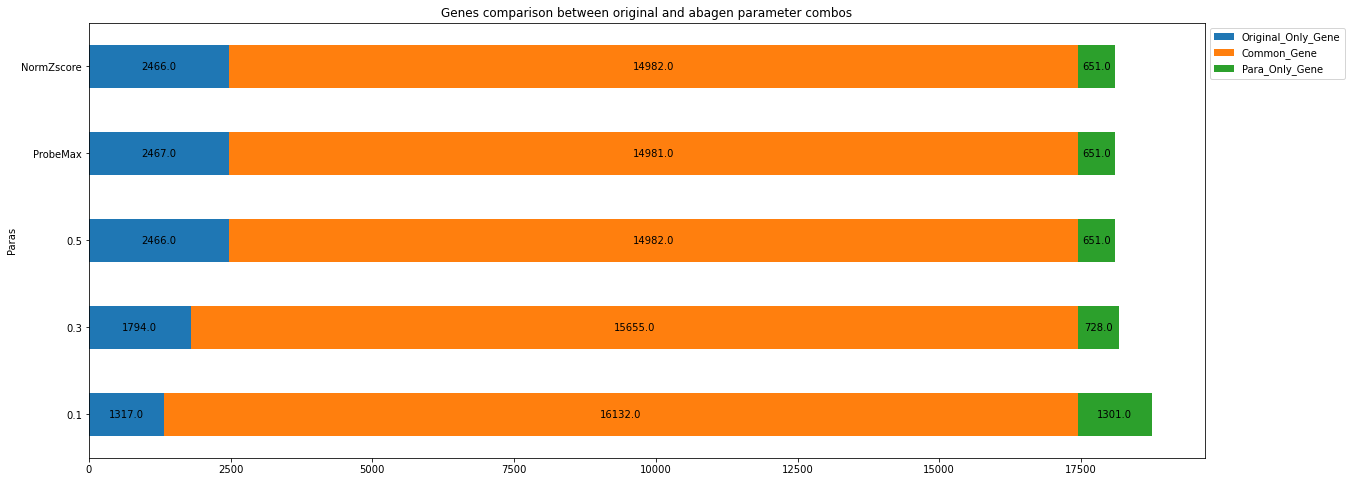

In [27]:
df = pd.DataFrame({'Paras':paras, 
                  'Original_Only_Gene':list(original_only_genes), 
                  'Common_Gene':list(common_genes), 
                  'Para_Only_Gene':list(para_only_genes) })

ax = df.plot(
    x = 'Paras',
    kind = 'barh',
    stacked = True,
    title = 'Genes comparison between original and abagen parameter combos',
    mark_right = True,
    figsize=(20,8))

df_total = df["Original_Only_Gene"] + df["Common_Gene"] + df["Para_Only_Gene"]
df_rel = df[df.columns[1:]].div(df_total, 0)*100

for n in df_rel:
    for i, (cs, ab, num) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                         df[n], df[n])):
        plt.text(cs - ab / 2, i, str(num), 
                 va = 'center', ha = 'center')
ax.legend(bbox_to_anchor=(1.0, 1.0))

In [25]:
df["Original_Only_Gene"]

0    1317.0
1    1794.0
2    2466.0
3    2467.0
4    2466.0
Name: Original_Only_Gene, dtype: float64